# 22AIE304 Deep Learning Labsheet 5

## Name: Aniketh Vijesh
## Roll No: AM.EN.U4AIE22009

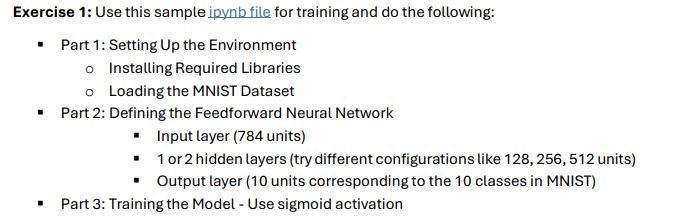

In [10]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [9]:
# Setting up the datasets and Dataloaders

train_set = datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)
test_set = datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)


train_loader = DataLoader(dataset=train_set, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=test_set, batch_size=64, shuffle=False, num_workers=2)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:09<00:00, 1088402.54it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 113572.77it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:01<00:00, 934304.80it/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 6468770.38it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [17]:
class FeedforwardNeuralNet(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, output_size=10, num_hidden_layers=1):
        super(FeedforwardNeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_size, hidden_size) for _ in range(num_hidden_layers - 1)])
        self.output = nn.Linear(hidden_size, output_size)
        self.activation = nn.Sigmoid()  # You can change this activation function later (e.g., ReLU)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input, keeping the batch size dimension
        x = self.activation(self.fc1(x))
        for layer in self.hidden_layers:
            x = self.activation(layer(x))
        x = self.output(x)  # Output layer does not use activation
        return x


Epoch 1/10, Loss: 2.2995
Epoch 2/10, Loss: 2.2933
Epoch 3/10, Loss: 2.2840
Epoch 4/10, Loss: 2.2683
Epoch 5/10, Loss: 2.2359
Epoch 6/10, Loss: 2.1621


KeyboardInterrupt: 